In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

%matplotlib inline

**HOMEWORK 1 CODE:**


In [3]:
uploaded = files.upload()

Saving Customer_Churn.xlsx to Customer_Churn.xlsx


In [4]:
df = pd.read_excel('Customer_Churn.xlsx')

In [5]:
df = df.dropna()
print(df.head())

  COLLEGE  INCOME  OVERAGE  LEFTOVER   HOUSE  HANDSET_PRICE  \
0    zero   31953        0         6  313378            161   
1     one   36147        0        13  800586            244   
2     one   27273      230         0  305049            201   
3    zero  120070       38        33  788235            780   
4     one   29215      208        85  224784            241   

   OVER_15MINS_CALLS_PER_MONTH  AVERAGE_CALL_DURATION REPORTED_SATISFACTION  \
0                            0                      4                 unsat   
1                            0                      6                 unsat   
2                           16                     15                 unsat   
3                            3                      2                 unsat   
4                           21                      1            very_unsat   

  REPORTED_USAGE_LEVEL CONSIDERING_CHANGE_OF_PLAN  LEAVE  
0               little                         no   STAY  
1               little      

In [6]:
df.describe()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,80281.447750,85.979550,23.898650,493155.264250,389.615100,8.000700,6.002250
std,41680.586319,85.992324,26.816645,252407.884692,213.820682,8.925418,4.402558
min,20007.000000,-2.000000,0.000000,150002.000000,130.000000,0.000000,1.000000
25%,42217.000000,0.000000,0.000000,263714.250000,219.000000,1.000000,2.000000
50%,75366.500000,59.000000,14.000000,452259.500000,326.000000,4.000000,5.000000
75%,115881.750000,179.000000,41.000000,702378.000000,533.250000,15.000000,10.000000
max,159983.000000,335.000000,89.000000,999996.000000,899.000000,29.000000,15.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   COLLEGE                      20000 non-null  object
 1   INCOME                       20000 non-null  int64 
 2   OVERAGE                      20000 non-null  int64 
 3   LEFTOVER                     20000 non-null  int64 
 4   HOUSE                        20000 non-null  int64 
 5   HANDSET_PRICE                20000 non-null  int64 
 6   OVER_15MINS_CALLS_PER_MONTH  20000 non-null  int64 
 7   AVERAGE_CALL_DURATION        20000 non-null  int64 
 8   REPORTED_SATISFACTION        20000 non-null  object
 9   REPORTED_USAGE_LEVEL         20000 non-null  object
 10  CONSIDERING_CHANGE_OF_PLAN   20000 non-null  object
 11  LEAVE                        20000 non-null  object
dtypes: int64(7), object(5)
memory usage: 1.8+ MB


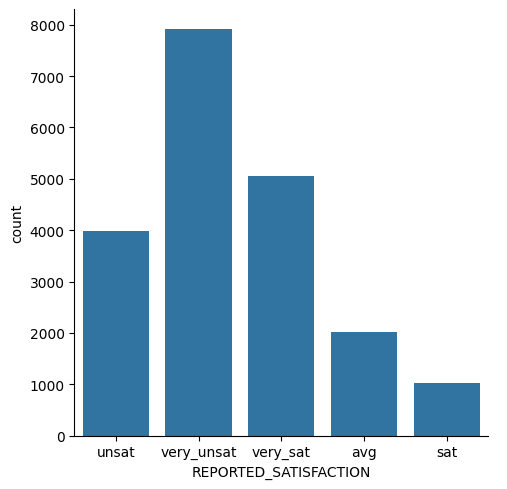

In [8]:
# Satisfaction

sns.catplot(x="REPORTED_SATISFACTION", kind="count", data=df)

<Axes: xlabel='REPORTED_USAGE_LEVEL', ylabel='AVERAGE_CALL_DURATION'>

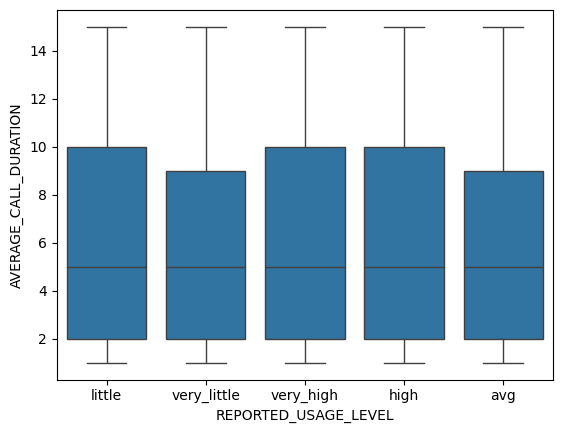

In [9]:
# Call duration by Reported Users

sns.boxplot(x='REPORTED_USAGE_LEVEL', y='AVERAGE_CALL_DURATION', data=df)

**HOMEWORK 2 CODE:**

In [10]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split


In [11]:
df_encoded = pd.get_dummies(df, columns=[
    'REPORTED_SATISFACTION',
    'REPORTED_USAGE_LEVEL',
    'CONSIDERING_CHANGE_OF_PLAN',
    'COLLEGE'
], drop_first=False) #one hot encoding

for col in df_encoded.columns: # convert T/F to 0/1
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)

# convert leave/stay
df_encoded['LEAVE'] = df_encoded['LEAVE'].map({'STAY': 0, 'LEAVE': 1})


df_encoded.head()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,LEAVE,REPORTED_SATISFACTION_avg,REPORTED_SATISFACTION_sat,...,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps,COLLEGE_one,COLLEGE_zero
0,31953,0,6,313378,161,0,4,0,0,0,...,1,0,0,0,0,0,1,0,0,1
1,36147,0,13,800586,244,0,6,0,0,0,...,1,0,0,0,1,0,0,0,1,0
2,27273,230,0,305049,201,16,15,0,0,0,...,0,0,1,0,0,0,0,1,1,0
3,120070,38,33,788235,780,3,2,1,0,0,...,0,1,0,0,1,0,0,0,0,1
4,29215,208,85,224784,241,21,1,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [12]:
# split data
X = df_encoded.drop('LEAVE', axis=1)  # features
y = df_encoded['LEAVE']               # target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [13]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1]))

# Cross-validation
cv_scores_dt = cross_val_score(dt, X_scaled, y, cv=5, scoring='accuracy')
print("Decision Tree CV Accuracy:", np.mean(cv_scores_dt))


[[1918 1126]
 [1148 1808]]
              precision    recall  f1-score   support

           0       0.63      0.63      0.63      3044
           1       0.62      0.61      0.61      2956

    accuracy                           0.62      6000
   macro avg       0.62      0.62      0.62      6000
weighted avg       0.62      0.62      0.62      6000

ROC AUC Score: 0.6208646659992639
Decision Tree CV Accuracy: 0.6125


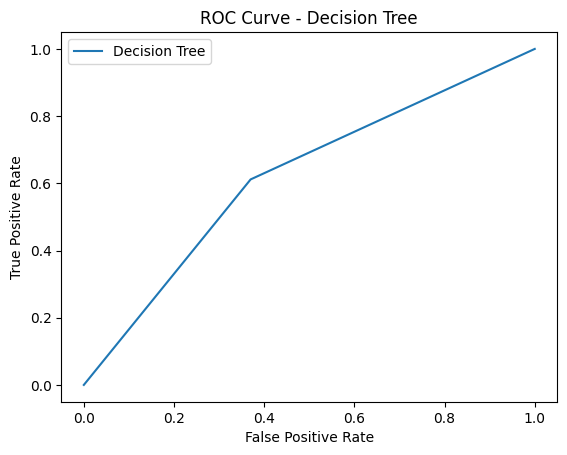

In [14]:
# plot ROC curve

fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend()
plt.show()


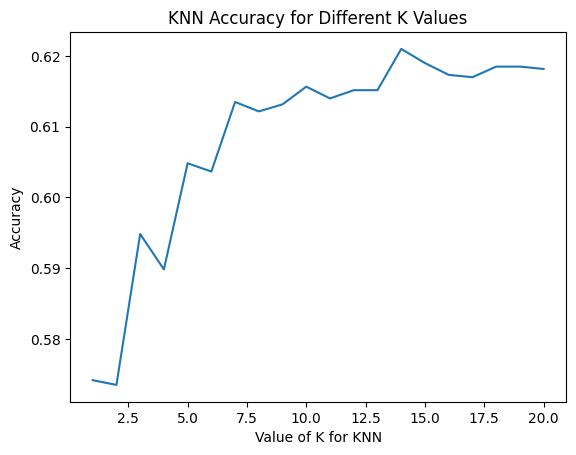

Best K: 14
[[2268  776]
 [1498 1458]]
              precision    recall  f1-score   support

           0       0.60      0.75      0.67      3044
           1       0.65      0.49      0.56      2956

    accuracy                           0.62      6000
   macro avg       0.63      0.62      0.61      6000
weighted avg       0.63      0.62      0.61      6000

ROC AUC Score: 0.6553011847881944
KNN CV Accuracy: 0.6163


In [15]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# Find best k using grid search
k_range = range(1, 21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

# Plot accuracy vs k
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy for Different K Values')
plt.show()

# Best K
best_k = k_range[np.argmax(scores)]
print(f"Best K: {best_k}")

# Train KNN with best K
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Predictions
y_pred_knn = knn.predict(X_test)

# Evaluation
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))
print("ROC AUC Score:", roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1]))

# Cross-validation
cv_scores_knn = cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy')
print("KNN CV Accuracy:", np.mean(cv_scores_knn))



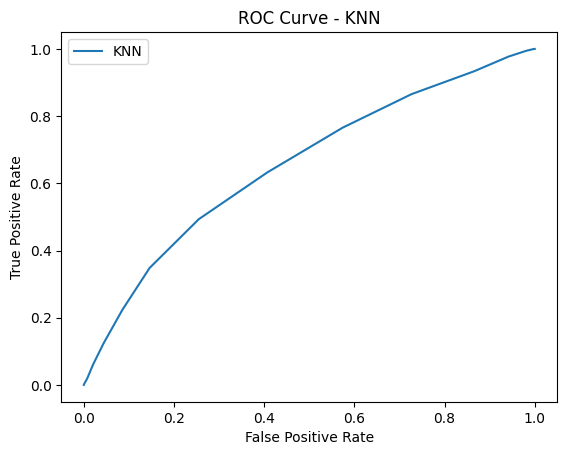

In [16]:
# Plot ROC Curve
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - KNN')
plt.legend()
plt.show()

In [17]:
# imbalance check

# Class distribution
print(df['LEAVE'].value_counts(normalize=True))

# Baseline accuracy (majority class)
baseline_accuracy = max(df['LEAVE'].value_counts(normalize=True))
print(f"Baseline Accuracy (always predicting majority class): {baseline_accuracy:.2f}")


LEAVE
STAY     0.5074
LEAVE    0.4926
Name: proportion, dtype: float64
Baseline Accuracy (always predicting majority class): 0.51


In [19]:
# Feature importance from Decision Tree
importances = dt.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show top features
print(feature_importance_df.head(10))


                                              Feature  Importance
3                                               HOUSE    0.197553
0                                              INCOME    0.183481
1                                             OVERAGE    0.156463
4                                       HANDSET_PRICE    0.111778
2                                            LEFTOVER    0.092678
5                         OVER_15MINS_CALLS_PER_MONTH    0.048858
6                               AVERAGE_CALL_DURATION    0.041447
20                      CONSIDERING_CHANGE_OF_PLAN_no    0.015024
18             CONSIDERING_CHANGE_OF_PLAN_considering    0.012084
17  CONSIDERING_CHANGE_OF_PLAN_actively_looking_in...    0.011838


In [21]:
# Convert LEAVE to 0/1 for correlation
df_corr = df_encoded.copy()

# Get correlations with churn
correlations = df_corr.corr()['LEAVE'].sort_values(ascending=False)

# Show top correlations
print("Top Correlated Features with LEAVE:")
print(correlations)


Top Correlated Features with LEAVE:
LEAVE                                                  1.000000
OVERAGE                                                0.235139
OVER_15MINS_CALLS_PER_MONTH                            0.202193
INCOME                                                 0.096320
HANDSET_PRICE                                          0.089221
LEFTOVER                                               0.060540
COLLEGE_one                                            0.014673
CONSIDERING_CHANGE_OF_PLAN_perhaps                     0.009983
REPORTED_SATISFACTION_unsat                            0.009768
REPORTED_SATISFACTION_very_unsat                       0.009210
CONSIDERING_CHANGE_OF_PLAN_no                          0.005950
REPORTED_USAGE_LEVEL_very_high                         0.004427
REPORTED_USAGE_LEVEL_very_little                       0.003557
REPORTED_USAGE_LEVEL_avg                               0.000397
CONSIDERING_CHANGE_OF_PLAN_actively_looking_into_it   -0.001628
REPO